# Word Embedding

## Word2Vec

### English

In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
import urllib.request
import zipfile
from lxml import etree
import re
from nltk.tokenize import word_tokenize, sent_tokenize

#### 훈련 데이터 이해

In [3]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/GaoleMeng/RNN-and-FFNN-textClassification/master/ted_en-20160408.xml',
                           filename = 'ted_en-20160408.xml')

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7f69147cc490>)

In [4]:
!ls -l ted_en-20160408.xml

-rw-r--r-- 1 root root 74533638 Sep  3 05:19 ted_en-20160408.xml


In [5]:
!more ted_en-20160408.xml

<?xml version="1.0" encoding="UTF-8"?>
<xml language="en"><file id="1">
  <head>
    <url>http://www.ted.com/talks/knut_haanaes_two_reasons_companies_fail_and_ho
w_to_avoid_them</url>
    <pagesize>72832</pagesize>
    <dtime>Fri Apr 01 00:57:03 CEST 2016</dtime>
    <encoding>UTF-8</encoding>
    <content-type>text/html; charset=utf-8</content-type>
    <keywords>talks, business, creativity, curiosity, goal-setting, innovation, 
motivation, potential, success, work</keywords>
    <speaker>Knut Haanaes</speaker>
    <talkid>2470</talkid>
    <videourl>http://download.ted.com/talks/KnutHaanaes_2015S.mp4</videourl>
    <videopath>talks/KnutHaanaes_2015S.mp4</videopath>
    <date>2015/06/30</date>
    <title>Knut Haanaes: Two reasons companies fail -- and how to avoid them</ti
tle>
    <description>TED Talk Subtitles and Transcript: Is it possible to run a comp
any and reinvent it at the same time? For business strategist Knut Haanaes, the 
ability to innovate after becoming successful is

#### 훈련 데이터 전처리

In [6]:
targetXML = open('ted_en-20160408.xml', 'r', encoding = 'UTF8')
target_text = etree.parse(targetXML)

In [7]:
parse_text = '\n'.join(target_text.xpath('//content/text()'))

In [8]:
content_text = re.sub(r'\([^)]*\)', '', parse_text)

In [9]:
sent_text = sent_tokenize(content_text)

In [10]:
normalized_text = []
for string in sent_text:
     tokens = re.sub(r'[^a-z0-9]+', ' ', string.lower())
     normalized_text.append(tokens)

In [11]:
result = [word_tokenize(sentence) for sentence in normalized_text]

In [12]:
print(f'총 샘플의 개수 : {len(result):,d}')

총 샘플의 개수 : 273,424


In [13]:
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


#### Word2Vec 훈련
- size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
- window = 컨텍스트 윈도우 크기
- min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
- workers = 학습을 위한 프로세스 수
- sg = 0은 CBOW, 1은 Skip-gram.

In [14]:
from gensim.models import Word2Vec
model = Word2Vec(
    sentences = result,
    size = 100,
    window = 5,
    min_count = 5,
    workers = 4,
    sg = 0
)

In [15]:
model_result = model.wv.most_similar('man')
print(model_result)

[('woman', 0.8536405563354492), ('guy', 0.8354492783546448), ('lady', 0.7717819809913635), ('girl', 0.7450155019760132), ('boy', 0.7447174787521362), ('soldier', 0.7362837791442871), ('gentleman', 0.7336243987083435), ('kid', 0.6962488889694214), ('poet', 0.6892122626304626), ('philosopher', 0.667752206325531)]


In [16]:
model.wv.most_similar(positive = ['man', 'girl'],
                      negative = ['boy'],
                      topn = 3)

[('woman', 0.8314418792724609),
 ('guy', 0.7830034494400024),
 ('lady', 0.7478955388069153)]

#### Word2Vec 모델 저장, 불러오기

In [17]:
from gensim.models import KeyedVectors
model.wv.save_word2vec_format('eng_w2v')

In [18]:
!ls -l

total 97876
-rw-r--r-- 1 root root     2171 Sep  3 05:16 한국어불용어100.txt
-rw-r--r-- 1 root root 25679774 Sep  3 05:21 eng_w2v
drwxr-xr-x 1 root root     4096 Sep  1 19:26 sample_data
-rw-r--r-- 1 root root 74533638 Sep  3 05:19 ted_en-20160408.xml


In [19]:
loaded_model = KeyedVectors.load_word2vec_format('eng_w2v')

In [20]:
loaded_model.most_similar('man')

[('woman', 0.8536405563354492),
 ('guy', 0.8354492783546448),
 ('lady', 0.7717819809913635),
 ('girl', 0.7450155019760132),
 ('boy', 0.7447174787521362),
 ('soldier', 0.7362837791442871),
 ('gentleman', 0.7336243987083435),
 ('kid', 0.6962488889694214),
 ('poet', 0.6892122626304626),
 ('philosopher', 0.667752206325531)]

### Korean

#### Naver Movie Review

In [21]:
!pip install konlpy > /dev/null

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt',
                           sep = '\t')
df.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


##### 데이터 전처리

In [24]:
df.shape, df.document.nunique()

((200000, 3), 194543)

In [25]:
df.drop_duplicates(subset = ['document'], inplace = True)
df.shape

(194544, 3)

In [26]:
df.isnull().sum()

id          0
document    1
label       0
dtype: int64

In [27]:
df.dropna(how = 'any', inplace = True)
df.shape

(194543, 3)

In [28]:
df['document'] = df.document.str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '')
df.head(3)

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1


In [29]:
df['document'].replace('', np.nan, inplace = True)
df.document.isnull().sum()

491

In [30]:
df.dropna(how = 'any', inplace = True)
df.shape

(194052, 3)

##### 불용어 사전 활용

In [31]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving 한국어불용어100.txt to 한국어불용어100 (1).txt


In [32]:
sdf = pd.read_csv(filename, sep = '\s+', header = None)
sdf.head()

,0,1,2
0,이,VCP,0.018280
1,있,VA,0.011699
2,하,VV,0.009774
3,것,NNB,0.009733
4,들,XSN,0.006898


In [33]:
stopwords = set(sdf[0])
len(stopwords)

94

##### 한글 형태소 분석

In [35]:
okt = Okt()
from tqdm.notebook import tqdm
tokenized_data = []
for sentence in tqdm(df.document):
    morphs = okt.morphs(sentence.strip(), stem = True)
    temp_list = [word for word in morphs if word not in stopwords]
    tokenized_data.append(temp_list)

  0%|          | 0/194052 [00:00<?, ?it/s]

리뷰의 최대 길이 :  68
리뷰의 평균 길이 :  11.385432770597571


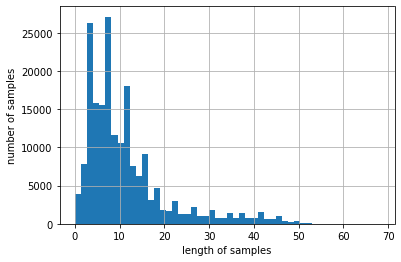

In [36]:
print('리뷰의 최대 길이 : ', max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 : ', sum(map(len, tokenized_data)) / len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.grid()
plt.show()

In [37]:
len(tokenized_data)

194052

##### Word2Vec 훈련
- size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
- window = 컨텍스트 윈도우 크기
- min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
- workers = 학습을 위한 프로세스 수
- sg = 0은 CBOW, 1은 Skip-gram.

In [38]:
from gensim.models import Word2Vec
model = Word2Vec(
    sentences = tokenized_data,
    size = 100,
    window = 5,
    min_count = 5,
    workers = 4,
    sg = 0
)

In [39]:
model.wv.vectors.shape

(16414, 100)

In [40]:
model.wv.most_similar('최민식')

[('박중훈', 0.8962115049362183),
 ('최민수', 0.8606274127960205),
 ('숀펜', 0.8535020351409912),
 ('감초', 0.8526548743247986),
 ('양동근', 0.8501983284950256),
 ('신들리다', 0.8432691097259521),
 ('워싱턴', 0.8399374485015869),
 ('송강호', 0.838826060295105),
 ('정재영', 0.8373611569404602),
 ('윤제문', 0.8369828462600708)]

In [41]:
model.wv.most_similar('히어로')

[('슬래셔', 0.8865185976028442),
 ('정통', 0.8614945411682129),
 ('무협', 0.8592275381088257),
 ('느와르', 0.8478178381919861),
 ('호러', 0.8414609432220459),
 ('무비', 0.8332163095474243),
 ('블록버스터', 0.8072026371955872),
 ('홍콩', 0.800692081451416),
 ('패러디', 0.7959753274917603),
 ('물의', 0.7953603267669678)]